<a href="https://colab.research.google.com/github/njenkinson/HWdata/blob/main/HW7_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


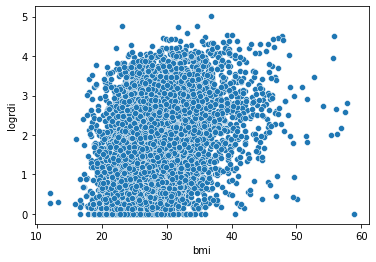

In [17]:
import pandas as pd
import numpy
import statsmodels.formula.api as smfa
import statsmodels.api as sma
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
%load_ext rpy2.ipython 

## Download in the data if it's not already there
! if [ ! -e shhs.trunc.csv ];\
  then wget https://raw.githubusercontent.com/njenkinson/HWdata/main/shhs.trunc.csv; \
fi;
dat = pd.read_csv("shhs.trunc.csv")
dat = dat.assign(logrdi = lambda x: numpy.log(dat['rdi4p']+1))

## Plot the scatterplot
sns.scatterplot(dat['bmi'], dat['logrdi'])

In [15]:
## Fit the linear regression model
fitsy = smfa.ols('logrdi ~ bmi', data = dat).fit()
fitsy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logrdi   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     973.8
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          5.47e-199
Time:                        20:12:29   Log-Likelihood:                -8893.0
No. Observations:                6333   AIC:                         1.779e+04
Df Residuals:                    6331   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3430      0.067     -5.111      0.000      -0.475      -0.211
bmi            0.0722      0.002     31.207      0.000       0.068       0.077
==============================================================================
Omnibus:                      202.903   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.575
Skew:                           0.266   Prob(JB):                     4.04e-32
Kurtosis:                       2.485   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the slope and intercept:

*   Intercept = -0.3430, which means that at BMI = 0, a person would have ln(RDI4p+1) of -0.3430. In more intuitive terms, at BMI = 0, a person would have ln(RDI4p+1) of (exp(-0.3430)-1) = -0.2903618.

*   Slope = 0.0722, which means that for every 1 kg/m^3 increase in BMI, the ln(RDI4p+1) would increase by 0.0722. In more intuitive terms, for every 1 kg/m^3 increase in BMI, the RDI4p would increase by (exp(0.0722)-1) = 0.0748703.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


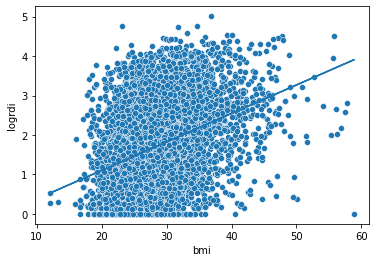

In [16]:
## Plot the regression model
yhat = fitsy.predict(dat['bmi'])

sns.scatterplot(dat['bmi'], dat['logrdi'])
plt.plot(x,yhat)